In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [9]:
train_data = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
train_data.shape

(7613, 5)

In [10]:
test_data = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
test_data.shape

(3263, 4)

In [11]:
train_data.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Data Visualization

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
train_data['length'] = train_data['text'].apply(len)
train_data.head(5)

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


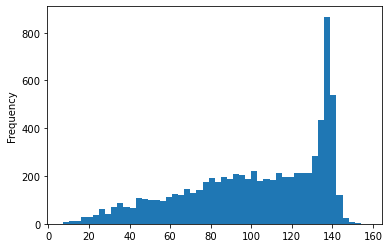

In [14]:
train_data['length'].plot(bins=50,kind='hist')

In [15]:
train_data.length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

**Texts with minimum length**

In [16]:
train_data[(train_data.length == 7)]

,id,keyword,location,text,target,length
1882,2703,crushed,NaN,Crushed,0,7
4890,6962,massacre,NaN,Bad day,0,7
5115,7295,nuclear%20reactor,NaN,Err:509,0,7


**Text with Maximum length**

In [17]:
print(train_data[(train_data.length == 157)]['text'].iloc[0])

when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????


In [18]:
train_data['location'].count()

5080

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f625b5bfe90>,
      dtype=object)

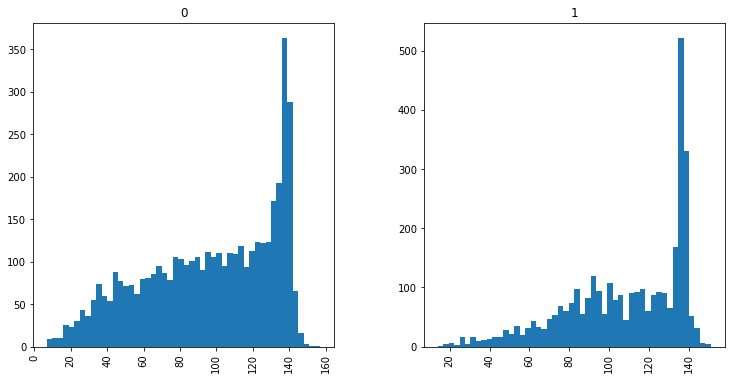

In [19]:
train_data.hist(column = 'length', by = 'target',bins = 50, figsize=(12,6))

# Text Preprocessing

In [20]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

**Remove punctuations and stopwords**

In [21]:
def process_text(text):
    """
    Removes punctuations(if any), stopwords and returns a list words
    """
    rm_pun = [char for char in text if char not in string.punctuation]
    rm_pun = ''.join(rm_pun)
    
    return [word for word in rm_pun.split() if word.lower() not in stopwords.words('english')]

**CountVectorizer - to convert the text into a matrix of token counts****

In [22]:
cv = CountVectorizer(analyzer=process_text).fit(train_data['text'])

In [23]:
print(len(cv.vocabulary_))

26473


**lets take text #10 **

In [24]:
text10 = train_data['text'][9]
text10

"I'm afraid that the tornado is coming to our area..."

**vector representation - an example**

In [25]:
cv10 = cv.transform([text10])
print(cv10)

  (0, 5375)	1
  (0, 11579)	1
  (0, 11856)	1
  (0, 13190)	1
  (0, 25334)	1


In [26]:
print(cv.get_feature_names()[5375])
print(cv.get_feature_names()[11579])
print(cv.get_feature_names()[11856])
print(cv.get_feature_names()[13190])
print(cv.get_feature_names()[25334])

Im
afraid
area
coming
tornado


In [27]:
cv10.shape

(1, 26473)

**transform the entire text data in the dataframe of train_data**

In [28]:
train_data_cv = cv.transform(train_data['text'])

In [29]:
print(train_data_cv.shape)

(7613, 26473)


# TF-IDF
Term Frequency, which measures how frequently a term occurs in a document.
Inverse Document Frequency, which measures how important a term is.


In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer().fit(train_data_cv)

**lets take the exampke of text #10**

In [31]:
tfidf10 = tfidf.transform(cv10)
print(tfidf10)

  (0, 25334)	0.45536446334127917
  (0, 13190)	0.4280504299394868
  (0, 11856)	0.4474300450504093
  (0, 11579)	0.5610337964594632
  (0, 5375)	0.30734909951226436


**tranforming the entire bag of words into the TF-IDF corpus **

In [32]:
train_data_tfidf = tfidf.transform(train_data_cv)
print(train_data_tfidf.shape)

(7613, 26473)


# Naive Bayes Classifier
Training the model

In [33]:
from sklearn.naive_bayes import MultinomialNB
target_model = MultinomialNB().fit(train_data_tfidf, train_data['target'])

**Model Evaluation**

In [34]:
print('predicted:', target_model.predict(tfidf10)[0])
print('expected:', train_data.target[9])

predicted: 1
expected: 1


# **Predictions for test data**

#test data vector and tf-idf****


In [37]:
test_data_cv = cv.transform(test_data['text'])

test_data_tfidf = tfidf.transform(test_data_cv)

In [40]:
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

In [41]:
sample_submission['target'] = target_model.predict(test_data_tfidf)

In [42]:
sample_submission.head(5)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


# file submission

In [43]:
sample_submission.to_csv("submission.csv", index=False)